In [30]:
import numpy  as np
import pandas as pd

In [31]:
file = 'iris.data'
df = pd.read_csv(file)
print(df.shape)
print(df.head())

(149, 5)
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [32]:
names = list(df.columns)

<AxesSubplot: >

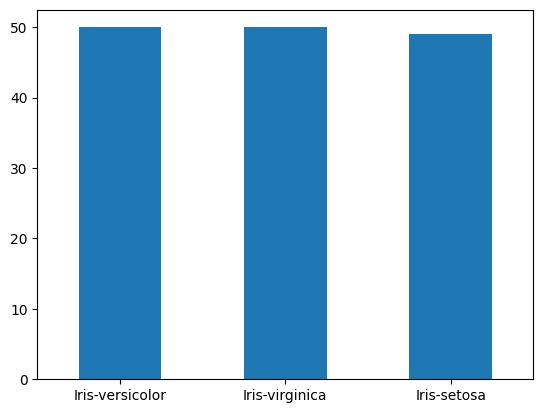

In [33]:
g = df[names[-1]].value_counts()
g.plot.bar(rot=0)

In [34]:
types = df.dtypes
types

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [35]:
data = df.values
data[:2]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']], dtype=object)

In [36]:
x = data [:,:-1]
y = data [:,-1]
x.shape,y.shape

((149, 4), (149,))

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled[0]

array([0.16666667, 0.41666667, 0.06779661, 0.04166667])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state = 42, test_size=0.25)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
Y_predict = KNN.predict(X_test)

In [41]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)
print(round(error/len(y) * 100),'%')

3
2 %


# Evaluating model

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[15  0  0]
 [ 0  9  2]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.90      0.82      0.86        11
 Iris-virginica       0.85      0.92      0.88        12

       accuracy                           0.92        38
      macro avg       0.92      0.91      0.91        38
   weighted avg       0.92      0.92      0.92        38

